In [1]:
# Import cac thu vien can thiet
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Sinh du lieu
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
    })


In [6]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [7]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,50.143727,2.727485,8.884822,8.635089,16.206491
1,37.601944,10.618908,10.942772,21.697245,20.518515
2,59.378575,1.496129,9.927097,8.228029,20.766242
3,46.542891,25.512764,9.322561,18.198041,19.864457
4,58.089599,19.283051,8.938972,-4.865947,19.227597


<AxesSubplot:ylabel='Density'>

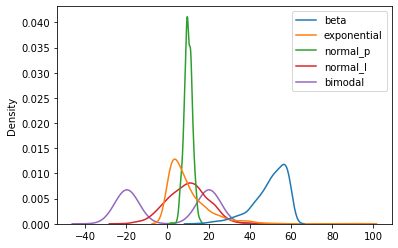

In [10]:
# Trực quan hóa dữ liệu sinh ra
sns.kdeplot(data=df)

In [11]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.951145,9.794048,10.052752,9.881146,0.215344
std,8.325778,9.920730,1.981846,9.719456,20.157099
min,14.509337,0.024985,1.827465,-20.927161,-31.086476
25%,45.849760,2.815259,8.755099,3.134511,-19.600932
50%,51.830350,6.805065,9.954060,10.100337,-0.326822
75%,56.387211,13.604204,11.397591,16.190694,20.039290
max,59.980797,94.002099,16.097586,42.866977,30.593669


<AxesSubplot:ylabel='Density'>

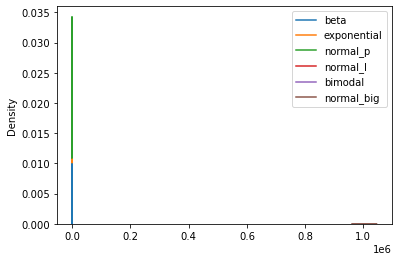

In [12]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

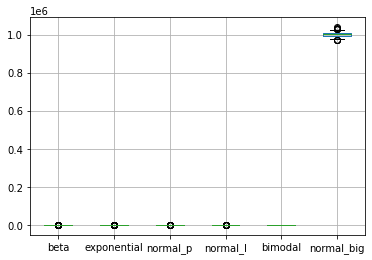

In [13]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [16]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.783665,0.028757,0.494555,0.463401,0.766745,0.725011
1,0.507848,0.112729,0.638769,0.668156,0.836655,0.539077
2,0.986756,0.015654,0.567594,0.457020,0.840671,0.556712
3,0.704476,0.271213,0.525230,0.613304,0.826051,0.227006
4,0.958409,0.204923,0.498349,0.251766,0.815726,0.693030


<AxesSubplot:ylabel='Density'>

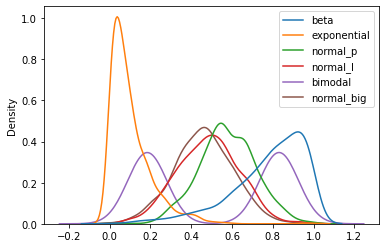

In [17]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

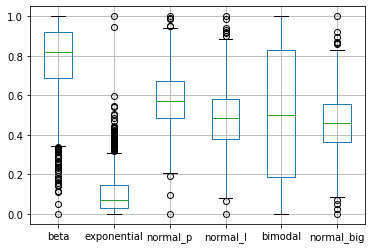

In [18]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [19]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.779430,0.103952,0.576399,0.482933,0.507486,0.460929
std,0.183099,0.105565,0.138881,0.152357,0.326800,0.145323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.689233,0.029691,0.485464,0.377177,0.186211,0.364455
50%,0.820757,0.072146,0.569483,0.486369,0.498696,0.461817
75%,0.920971,0.144495,0.670641,0.581838,0.828885,0.554581
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [24]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [22]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[14.5093373905193,
 0.02498460771013139,
 1.827464964520349,
 -20.92716080725793,
 -31.08647627958559,
 968698.4207413946]

In [33]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins_s = [df_s[col].min() for col in df_s.columns]
mins_s

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [35]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.98079669994308,
 94.00209920206899,
 16.097585545987222,
 42.86697662271557,
 30.593669006652597,
 1037669.234631066]

In [37]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs_s = [df_s[col].max() for col in df_s.columns]
maxs_s

[1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0]